In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import datasets, models, transforms
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
import torchvision

In [15]:
original_folder = "C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/lisat_gaze_data_mixed/train"

In [16]:
import os
import shutil
import random

train_folder = "C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/train"
val_folder = "C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/val"

os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

split_percentage = 0.8

for class_folder in os.listdir(original_folder):
  class_path = os.path.join(original_folder, class_folder)
  if os.path.isdir(class_path):
    files = os.listdir(class_path)
    random.shuffle(files)
    split_point = int(len(files) * split_percentage)
    train_files = files[:split_point]
    val_files = files[split_point:]
    for file_name in train_files:
      src = os.path.join(class_path, file_name)
      dst = os.path.join(train_folder, class_folder, file_name)
      os.makedirs(os.path.dirname(dst), exist_ok=True)
      shutil.copy(src, dst)
    for file_name in val_files:
      src = os.path.join(class_path, file_name)
      dst = os.path.join(val_folder, class_folder, file_name)
      os.makedirs(os.path.dirname(dst), exist_ok=True)
      shutil.copy(src, dst)

print("Splitting completed successfully.")

Splitting completed successfully.


In [17]:
def count_files_in_folders(directory):
  for root, dirs, files in os.walk(directory):
    print(f"Folder: {root}")
    file_count = len(files)
    print(f"Number of files: {file_count}")
    print("-" * 20)
count_files_in_folders(train_folder)

Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/train
Number of files: 0
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/train\Eyes Closed
Number of files: 2375
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/train\Forward
Number of files: 2829
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/train\Left Mirror
Number of files: 2600
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/train\Radio
Number of files: 2829
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/train\Rearview
Number of files: 2746
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/train\Right Mirror
Number of files: 2512
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/train\Shoulder
Number of files: 5076
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet5

In [18]:
def count_files_in_folders(directory):
  for root, dirs, files in os.walk(directory):
    print(f"Folder: {root}")
    file_count = len(files)
    print(f"Number of files: {file_count}")
    print("-" * 20)
count_files_in_folders(val_folder)

Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/val
Number of files: 0
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/val\Eyes Closed
Number of files: 594
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/val\Forward
Number of files: 708
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/val\Left Mirror
Number of files: 651
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/val\Radio
Number of files: 708
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/val\Rearview
Number of files: 687
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/val\Right Mirror
Number of files: 628
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/new/val\Shoulder
Number of files: 1269
--------------------
Folder: C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/n

In [19]:
input_path='C:/Users/AS-GP/Desktop/Resnet50/lisat_gaze_data_v1/'

In [20]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

data_transforms = {
    'train':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ]),
    'validation':
    transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor(), #for parallel computations
        normalize
    ]),
}

#train_subset_size = int(0.4 * len(datasets.ImageFolder(input_path + 'train_1250', transform=data_transforms['train']))) #testing hashelha b3den

image_datasets = {
    'train':
    datasets.ImageFolder(input_path + 'new/train', data_transforms['train']),
    'validation':
    datasets.ImageFolder(input_path + 'new/val', data_transforms['validation'])
}

dataloaders = {
    'train':
    torch.utils.data.DataLoader(image_datasets['train'],
                                batch_size=32,
                                shuffle=True,
                                num_workers=2),  # for now 2
    'validation':
    torch.utils.data.DataLoader(image_datasets['validation'],
                                batch_size=32,
                                shuffle=False,
                                num_workers=2)  # for Kaggle
}


In [21]:
print("Train dataset size:", len(image_datasets['train']))
print("Validation dataset size:", len(image_datasets['validation']))

Train dataset size: 24001
Validation dataset size: 6004


In [ ]:
# from torch.utils.data import random_split

# normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                  std=[0.229, 0.224, 0.225])

# data_transforms = {
#     'train':
#     transforms.Compose([
#         transforms.Resize((224,224)),
#         transforms.RandomAffine(0, shear=10, scale=(0.8,1.2)),
#         transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
#         normalize
#     ])
# }
# full_dataset = datasets.ImageFolder(input_path + 
#                                     '/train', 
#                                     data_transforms['train'])

# # Calculate the sizes of the training and validation sets
# train_size = int(0.8 * len(full_dataset))
# val_size = len(full_dataset) - train_size

# # Split the dataset into training and validation sets
# train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# # Create data loaders for training and validation sets
# dataloaders = {
#     'train': torch.utils.data.DataLoader(train_dataset,
#                                          batch_size=32,
#                                          shuffle=True,
#                                          num_workers=2),
#     'validation': torch.utils.data.DataLoader(val_dataset,
#                                               batch_size=32,
#                                               shuffle=True,
#                                               num_workers=2)
# }
# print(len(train_dataset))
# print(len(val_dataset))

In [22]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [23]:
model =torchvision.models.mobilenet_v3_small(pretrained=True).to(device)
model

C:\Users\AS-GP\AppData\Local\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\AS-GP\AppData\Local\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [24]:
model =torchvision.models.mobilenet_v3_small(pretrained=True).to(device)

for param in model.parameters():
    param.requires_grad = False

# Define constants
NUM_CLASSES = 8
INPUT_FEATURES = 576
HIDDEN_FEATURES = 1024
OUTPUT_FEATURES = 1280

# Define the custom classifier
classifier = nn.Sequential(
    nn.Linear(INPUT_FEATURES, HIDDEN_FEATURES, bias=True),
    nn.Hardswish(),
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(HIDDEN_FEATURES, OUTPUT_FEATURES, bias=True),
    nn.Linear(OUTPUT_FEATURES, NUM_CLASSES, bias=True),  # Output layer with 8 classes
    nn.Softmax(dim=1)
)

# Replace the default classifier with the custom one
model.classifier = classifier

model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [35]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.Adam(model.classifier.parameters(),lr=0.0001,weight_decay = 0.01)
optimizer = optim.Adam(model.classifier.parameters(), 
                       lr=1e-4, weight_decay=1e-4)

In [36]:
class EarlyStopper:
    def __init__(self, patience=10, min_delta=0.5):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_accuracy = 0

    def early_stop(self, current_accuracy):
        if (current_accuracy > self.best_accuracy + self.min_delta):
            self.best_accuracy = current_accuracy
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [37]:
weights_path='MNV3_small_weights_500.h5'

In [38]:
early_stopper = EarlyStopper(20,0.01)
def train_model(model, criterion, optimizer, num_epochs=5):
    training_accuracies = []
    validation_accuracies = []
    training_accuracies.append(0)
    validation_accuracies.append(0)
    #optimizer = optim.Adam(model.fc.parameters(), lr=learning_rate, weight_decay=weight_decay)
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        for phase in ['train', 'validation']:
            if phase == 'train':
                model.train().to(device) #added to device
            else:
                model.eval().to(device)

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs).to(device)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

                _, preds = torch.max(outputs, 1)
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                epoch_loss = running_loss / len(image_datasets[phase])
                epoch_acc = running_corrects.double() / len(image_datasets[phase])
                training_accuracies.append(epoch_acc.item()*100)
            else:
                epoch_loss = running_loss / len(image_datasets[phase])
                epoch_acc = running_corrects.double() / len(image_datasets[phase])
                validation_accuracies.append(epoch_acc.item()*100)
                if early_stopper.early_stop(epoch_acc.item()*100):
                    print('triggered ES Tacc: {:.4f}, Vacc: {:.4f}'.format(training_accuracies[-1], 
                                                                           validation_accuracies[-1]))            
                    return model,training_accuracies,validation_accuracies
            
                if epoch_acc.item()*100 >= early_stopper.best_accuracy:
                    #early_stopper.early_stop(epoch_acc.item()*100)
                    #early_stopper.best_accuracy = epoch_acc.item()*100
                    print('best accuracy {:.4f}'.format(early_stopper.best_accuracy))
                    torch.save(model.state_dict(), weights_path)
                    print(f"Model saved as it achieved the best validation accuracy so far {early_stopper.best_accuracy}" )

            print('{} loss: {:.4f}, acc: {:.4f}'.format(phase,
                                                        epoch_loss,
                                                        epoch_acc))
    return model,training_accuracies,validation_accuracies 

In [39]:
model_trained = train_model(model, criterion, optimizer, num_epochs=500) #1 epoch for testing gpu

Epoch 1/500
----------
train loss: 1.6743, acc: 0.6147
best accuracy 66.8055
Model saved as it achieved the best validation accuracy so far 66.80546302465024
validation loss: 1.6234, acc: 0.6681
Epoch 2/500
----------
train loss: 1.6230, acc: 0.6612
best accuracy 72.0520
Model saved as it achieved the best validation accuracy so far 72.05196535642905
validation loss: 1.5605, acc: 0.7205
Epoch 3/500
----------
train loss: 1.5765, acc: 0.7055
best accuracy 73.8008
Model saved as it achieved the best validation accuracy so far 73.80079946702199
validation loss: 1.5443, acc: 0.7380
Epoch 4/500
----------
train loss: 1.5495, acc: 0.7307
best accuracy 75.8328
Model saved as it achieved the best validation accuracy so far 75.83277814790141
validation loss: 1.5246, acc: 0.7583
Epoch 5/500
----------
train loss: 1.5345, acc: 0.7441
best accuracy 77.5983
Model saved as it achieved the best validation accuracy so far 77.59826782145237
validation loss: 1.5013, acc: 0.7760
Epoch 6/500
----------
tr

train loss: 1.4333, acc: 0.8412
validation loss: 1.4117, acc: 0.8638
Epoch 69/500
----------
train loss: 1.4244, acc: 0.8506
validation loss: 1.4111, acc: 0.8646
Epoch 70/500
----------
train loss: 1.4277, acc: 0.8476
best accuracy 87.9247
Model saved as it achieved the best validation accuracy so far 87.92471685542972
validation loss: 1.3971, acc: 0.8792
Epoch 71/500
----------
train loss: 1.4256, acc: 0.8504
validation loss: 1.4021, acc: 0.8718
Epoch 72/500
----------
train loss: 1.4282, acc: 0.8463
validation loss: 1.4023, acc: 0.8723
Epoch 73/500
----------
train loss: 1.4249, acc: 0.8499
validation loss: 1.3987, acc: 0.8759
Epoch 74/500
----------
train loss: 1.4254, acc: 0.8501
validation loss: 1.4089, acc: 0.8678
Epoch 75/500
----------
train loss: 1.4227, acc: 0.8529
validation loss: 1.4152, acc: 0.8581
Epoch 76/500
----------
train loss: 1.4281, acc: 0.8468
validation loss: 1.3992, acc: 0.8761
Epoch 77/500
----------
train loss: 1.4213, acc: 0.8544
validation loss: 1.4070, acc

In [40]:
classes_labels = ['Eyes Closed','Forward','Left Mirror','Radio','Rearview','Right Mirror','Shoulder','Speedometer']

In [41]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(model, dataloader, num_classes):
    # Set the model to evaluation mode
    model.eval()

    # Initialize lists to store the true and predicted labels
    true_labels = []
    pred_labels = []

    # Iterate over the validation dataset
    with torch.no_grad():
        for images, labels in dataloader:

            # Move the input tensor to the same device as the model weights
            if next(model.parameters()).is_cuda:
                images = images.cuda()

            # Forward pass
            outputs = model(images)

            # Get the predicted labels
            _, predicted = torch.max(outputs.data, 1)


            # Store the true and predicted labels
            true_labels += labels.cpu().numpy().tolist()
            pred_labels += predicted.cpu().numpy().tolist()

    print(true_labels)
    # Compute the confusion matrix
    cm = confusion_matrix(true_labels, pred_labels)
    
    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.imshow(cm, cmap='Blues')
    plt.xticks(range(num_classes),classes_labels)
    plt.yticks(range(num_classes),classes_labels)
    cm = np.around(cm.astype('float')/cm.sum(axis=1)[:,np.newaxis],decimals=2)
    plt.colorbar()
    plt.clim(0, max(cm.max(), cm.sum()))
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      color = "white" if cm[i, j] > thresh else "black"
      plt.text(j, i, cm[i, j], horizontalalignment="center", color=color)


    plt.tight_layout()
    plt.ylim(num_classes, -0.5)
    plt.show()
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

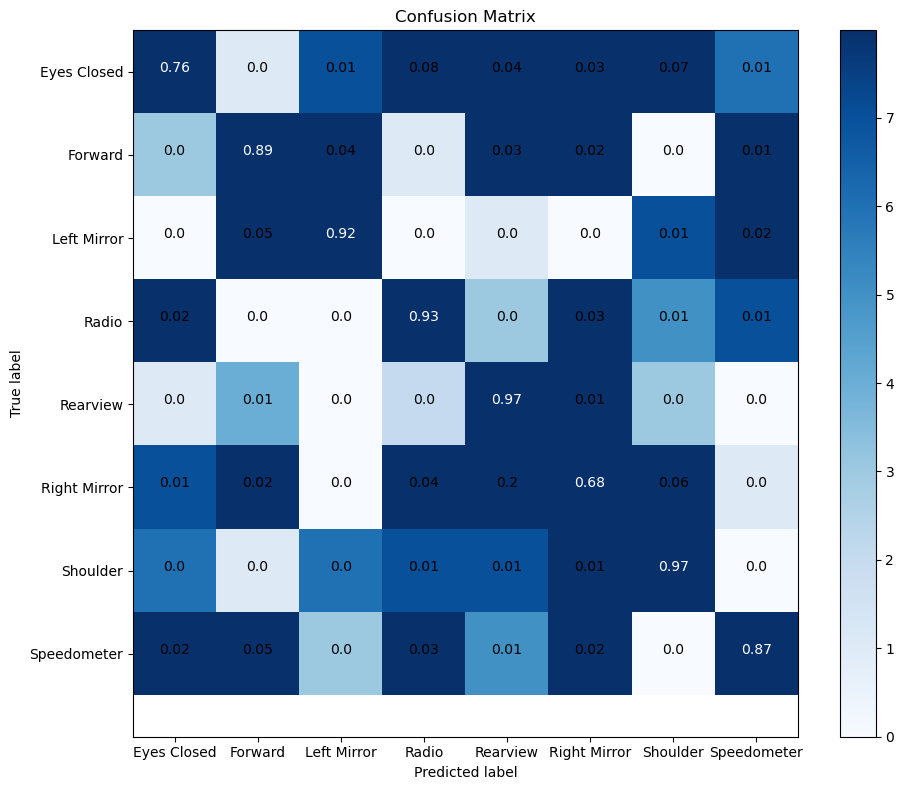

In [42]:
plot_confusion_matrix(model,dataloaders['validation'],8)

In [43]:
model.load_state_dict(torch.load("MNV3_small_weights_500.h5"))
model.eval()

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [62]:
model_path="MNV3_small_weights_500.h5"

model =torchvision.models.mobilenet_v3_small(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

# Define constants
NUM_CLASSES = 8
INPUT_FEATURES = 576
HIDDEN_FEATURES = 1024
OUTPUT_FEATURES = 1280

# Define the custom classifier
classifier = nn.Sequential(
    nn.Linear(INPUT_FEATURES, HIDDEN_FEATURES, bias=True),
    nn.Hardswish(),
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(HIDDEN_FEATURES, OUTPUT_FEATURES, bias=True),
    nn.Linear(OUTPUT_FEATURES, NUM_CLASSES, bias=True),  # Output layer with 8 classes
    nn.Softmax(dim=1)
)

# Replace the default classifier with the custom one
model.classifier = classifier
model.load_state_dict(torch.load(model_path))
model.eval()
eyeGazeClasses = ['Eyes Closed', 'Forward', 'Left Mirror', 'Radio', 
                  'Rearview', 'Right Mirror', 'Shoulder', 'Speedometer']

In [80]:
import cv2
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
# Preprocess the image (assuming frame is a path or numpy array)
frame = "test/cropped_with_box_350.png"
pil_image = Image.fromarray(cv2.cvtColor(cv2.imread(frame), cv2.COLOR_BGR2RGB))
input_image = transform(pil_image).unsqueeze(0)  # Add batch dimension

# Make prediction
output = model(input_image)

# Get the predicted class with the highest probability
_, predicted = torch.max(output.data, 1)

# Print the predicted class
print(f"Predicted Class: {eyeGazeClasses[predicted.item()]}")
print(output)

Predicted Class: Rearview
tensor([[5.6895e-16, 1.1380e-02, 7.2219e-08, 1.9784e-11, 9.8860e-01, 2.5180e-06,
         1.2782e-05, 1.2565e-07]], grad_fn=<SoftmaxBackward0>)


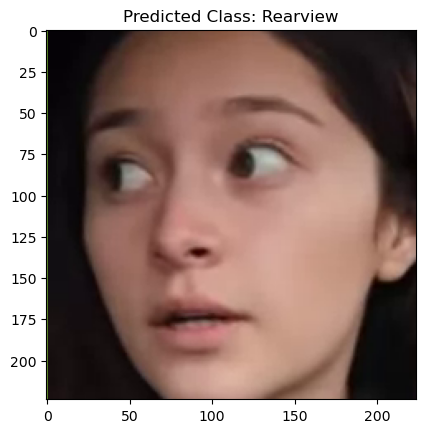

In [81]:
# Show the image (assuming it's a color image)
plt.imshow(pil_image)
plt.title(f"Predicted Class: {eyeGazeClasses[predicted.item()]}")
plt.show()